In [313]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [314]:
def get_dataset(url, country):
    raw_dataset = pd.read_csv(url)
    df = raw_dataset[raw_dataset["Country"]==country].reset_index(drop=True) 
    df.insert(5, 'Day', range(1, 1 + len(df)))
    for i in range(0, len(df)):
        df.loc[i, 'Active']    = df.loc[i, 'Confirmed'] - df.loc[i, 'Recovered']
        df.loc[i, 'New_Cases'] = 0 if i == 0 else df.loc[i, 'Confirmed'] - df.loc[i-1, 'Confirmed']
        df.loc[i, 'Spread_Rate'] = None if i == 0 else df.loc[i, 'Active'] / df.loc[i-1, 'Active']
        df.loc[i, 'New_Cases_Diff'] = 0 if i == 0 else df.loc[i, 'New_Cases'] - df.loc[i-1, 'New_Cases']
        df.loc[i, 'Spread_Rate_Diff'] = (0 if i == 0 else df.loc[i, 'Spread_Rate'] - df.loc[i-1, 'Spread_Rate']) * 100
    return df[['Country', 'Date','Day','Confirmed','Recovered','Deaths','Active','New_Cases','New_Cases_Diff','Spread_Rate','Spread_Rate_Diff']].reset_index(drop=True) 


In [315]:
def plot_graph(dataset, x, y, title):
    dataset.plot(x=x, y=y, style='--')  
    plt.title(title)  
    plt.xlabel(x)  
    plt.ylabel(y)  
    plt.show()

In [316]:
warnings.filterwarnings('ignore')
url="/Users/laya/Desktop/work/projects/data/country/covid-19/data/countries-aggregated.csv"
train_cnt = 15
ds = get_dataset(url, 'Canada')

In [317]:
ds = ds.tail(15).reset_index(drop=True)
# for i in range(0, len(df)):
#     df.loc[i, 'Active'] = df.loc[i, 'Confirmed'] - df.loc[i, 'Recovered']

ds1 = ds.loc[0:4]
ds2 = ds.loc[5:9]
ds3 = ds.loc[10:14]
ds1

,Country,Date,Day,Confirmed,Recovered,Deaths,Active,New_Cases,New_Cases_Diff,Spread_Rate,Spread_Rate_Diff
0,Canada,2020-04-08,78,19141,4154,407,14987.00,1269.00,-40.00,1.06,0.62
1,Canada,2020-04-09,79,20654,5162,503,15492.00,1513.00,244.00,1.03,-3.06
2,Canada,2020-04-10,80,22059,5855,557,16204.00,1405.00,-108.00,1.05,1.23
3,Canada,2020-04-11,81,23316,6589,654,16727.00,1257.00,-148.00,1.03,-1.37
4,Canada,2020-04-12,82,24298,7123,714,17175.00,982.00,-275.00,1.03,-0.55


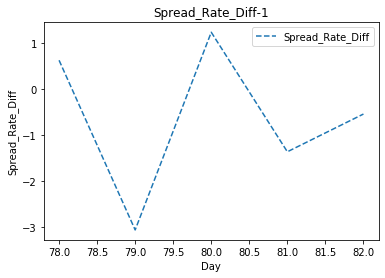

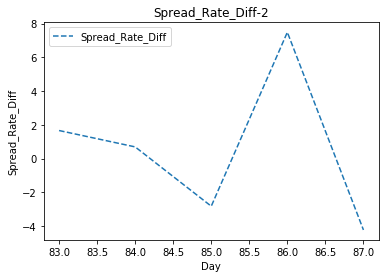

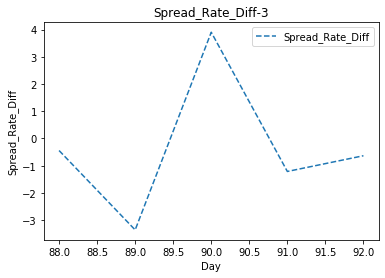

-3.1381830253628173

In [318]:
plot_graph(ds1, 'Day', 'Spread_Rate_Diff', 'Spread_Rate_Diff-1')
plot_graph(ds2, 'Day', 'Spread_Rate_Diff', 'Spread_Rate_Diff-2')
plot_graph(ds3, 'Day', 'Spread_Rate_Diff', 'Spread_Rate_Diff-3')
ds1['Spread_Rate_Diff'].sum()

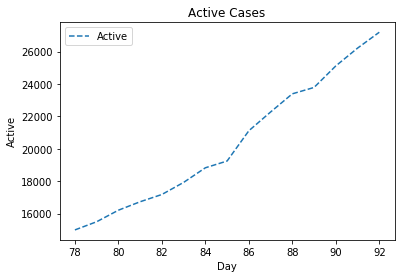

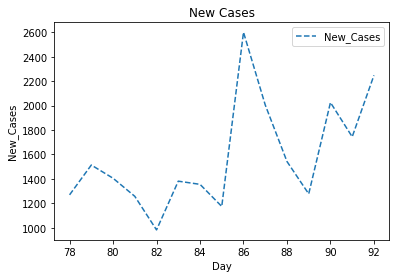

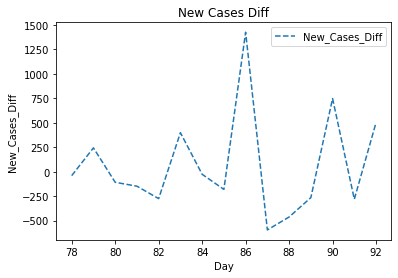

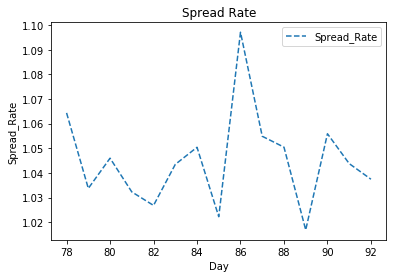

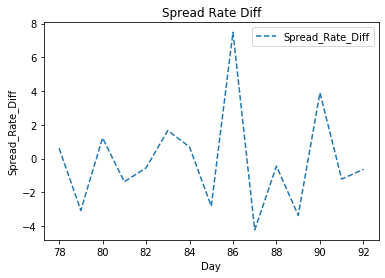

In [319]:
plot_graph(ds, 'Day', 'Active', 'Active Cases')
plot_graph(ds, 'Day', 'New_Cases', 'New Cases')
plot_graph(ds, 'Day', 'New_Cases_Diff', 'New Cases Diff')
plot_graph(ds, 'Day', 'Spread_Rate', 'Spread Rate')
plot_graph(ds, 'Day', 'Spread_Rate_Diff', 'Spread Rate Diff')

In [320]:
ds

,Country,Date,Day,Confirmed,Recovered,Deaths,Active,New_Cases,New_Cases_Diff,Spread_Rate,Spread_Rate_Diff
0,Canada,2020-04-08,78,19141,4154,407,14987.00,1269.00,-40.00,1.06,0.62
1,Canada,2020-04-09,79,20654,5162,503,15492.00,1513.00,244.00,1.03,-3.06
2,Canada,2020-04-10,80,22059,5855,557,16204.00,1405.00,-108.00,1.05,1.23
3,Canada,2020-04-11,81,23316,6589,654,16727.00,1257.00,-148.00,1.03,-1.37
4,Canada,2020-04-12,82,24298,7123,714,17175.00,982.00,-275.00,1.03,-0.55
5,Canada,2020-04-13,83,25679,7758,779,17921.00,1381.00,399.00,1.04,1.67
6,Canada,2020-04-14,84,27034,8210,899,18824.00,1355.00,-26.00,1.05,0.70
7,Canada,2020-04-15,85,28208,8966,1006,19242.00,1174.00,-181.00,1.02,-2.82
8,Canada,2020-04-16,86,30808,9698,1257,21110.00,2600.00,1426.00,1.10,7.49
9,Canada,2020-04-17,87,32813,10545,1354,22268.00,2005.00,-595.00,1.05,-4.22


In [321]:
# ds = ds.tail(15)
# X = ds['Day'].values.reshape(-1,1)
# y = ds['Spread_Rate'].values.reshape(-1,1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# regressor = LinearRegression()
# regressor.fit(X_train, y_train) #training the algorithm    
# y_pred = regressor.predict(X_test)
# y_train_pred = regressor.predict(X_train)
# plt.scatter(X_train, y_train,  color='gray')
# plt.plot(X_train, y_train_pred, color='red', linewidth=2)

In [361]:
warnings.filterwarnings('ignore')
url="/Users/laya/Desktop/work/projects/data/country/covid-19/data/countries-aggregated.csv"
train_cnt = 15
ds = get_dataset(url, 'Canada').tail(train_cnt)

In [329]:
ds

,Country,Date,Day,Confirmed,Recovered,Deaths,Active,New_Cases,New_Cases_Diff,Spread_Rate,Spread_Rate_Diff
87,Canada,2020-04-18,88,34355,10964,1399,23391.00,1542.00,-463.00,1.05,-0.44
88,Canada,2020-04-19,89,35632,11847,1563,23785.00,1277.00,-265.00,1.02,-3.36
89,Canada,2020-04-20,90,37657,12543,1725,25114.00,2025.00,748.00,1.06,3.90
90,Canada,2020-04-21,91,39401,13188,1908,26213.00,1744.00,-281.00,1.04,-1.21
91,Canada,2020-04-22,92,41648,14454,2075,27194.00,2247.00,503.00,1.04,-0.63


In [378]:
X = ds['Day'].values.reshape(-1,1)
y = ds['Spread_Rate'].values.reshape(-1,1)
poly_reg= PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

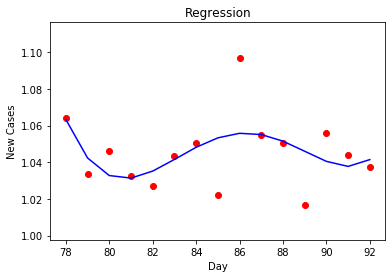

In [376]:
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Regression')
plt.xlabel('Day')
plt.ylabel('New Cases')
plt.show()

In [377]:
np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.2f}'.format})
my_list = np.reshape(range(92,150), (-1, 1))
pol_reg.predict(poly_reg.fit_transform(my_list))

array([[1.04],
       [1.06],
       [1.09],
       [1.14],
       [1.22],
       [1.35],
       [1.51],
       [1.73],
       [2.01],
       [2.35],
       [2.77],
       [3.27],
       [3.85],
       [4.51],
       [5.24],
       [6.04],
       [6.89],
       [7.76],
       [8.64],
       [9.47],
       [10.21],
       [10.78],
       [11.11],
       [11.10],
       [10.62],
       [9.53],
       [7.65],
       [4.80],
       [0.71],
       [-4.86],
       [-12.25],
       [-21.82],
       [-33.99],
       [-49.23],
       [-68.08],
       [-91.16],
       [-119.16],
       [-152.85],
       [-193.11],
       [-240.91],
       [-297.33],
       [-363.59],
       [-441.03],
       [-531.13],
       [-635.55],
       [-756.10],
       [-894.78],
       [-1053.78],
       [-1235.54],
       [-1442.69],
       [-1678.13],
       [-1945.02],
       [-2246.83],
       [-2587.32],
       [-2970.58],
       [-3401.07],
       [-3883.63],
       [-4423.49]])